# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from sducs2019.classifiers.neural_net import ThreeLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `ThreeLayerNet` in the file `sducs2019/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return ThreeLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `sducs2019/classifiers/neural_net.py` and look at the method `ThreeLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
 [-0.03596154, -0.01613583, -0.00048556],
  [-0.09480192, 0.20724618, -0.09763798],
  [-0.07015667, 0.17081869, -0.07675745],
  [0.01473052, 0.09321097, -0.0395178],
  [-0.05306489, 0.04729807, 0.01750587]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.03596154 -0.01613583 -0.00048556]
 [-0.09480192  0.20724618 -0.09763798]
 [-0.07015667  0.17081869 -0.07675745]
 [ 0.01473052  0.09321097 -0.0395178 ]
 [-0.05306489  0.04729807  0.01750587]]

correct scores:
[[-0.03596154 -0.01613583 -0.00048556]
 [-0.09480192  0.20724618 -0.09763798]
 [-0.07015667  0.17081869 -0.07675745]
 [ 0.01473052  0.09321097 -0.0395178 ]
 [-0.05306489  0.04729807  0.01750587]]

Difference between your scores and correct scores:
4.807962379632267e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.025)
correct_loss =  1.131301031558

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
7.829292769656604e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`,`W2`, `b2`, `W3`, and `b3`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from sducs2019.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.025)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.025)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b3 max relative error: 8.494237e-11
W3 max relative error: 1.067978e-08
b2 max relative error: 4.590211e-10
W2 max relative error: 2.542857e-08
b1 max relative error: 7.670389e-09
W1 max relative error: 3.561318e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `ThreeLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `ThreeLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a three-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.13032214114367924


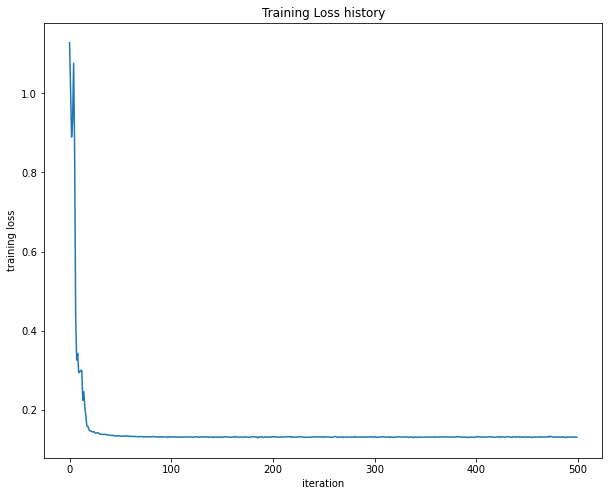

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=0.6, reg=0.025,
            num_iters=500, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a three-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from sducs2019.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the three-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'sducs2019/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 200
num_classes = 10
net = ThreeLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=10000, batch_size=150,
            learning_rate=5e-3, learning_rate_decay=0.95,
            reg=0.01, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 10000: loss 2.302651
iteration 100 / 10000: loss 2.302592
iteration 200 / 10000: loss 2.302729
iteration 300 / 10000: loss 2.302715
iteration 400 / 10000: loss 2.303174
iteration 500 / 10000: loss 2.302842
iteration 600 / 10000: loss 2.302879
iteration 700 / 10000: loss 2.302658
iteration 800 / 10000: loss 2.302787
iteration 900 / 10000: loss 2.302784
iteration 1000 / 10000: loss 2.302632
iteration 1100 / 10000: loss 2.302490
iteration 1200 / 10000: loss 2.302762
iteration 1300 / 10000: loss 2.302448
iteration 1400 / 10000: loss 2.302810
iteration 1500 / 10000: loss 2.302318
iteration 1600 / 10000: loss 2.302822
iteration 1700 / 10000: loss 2.302618
iteration 1800 / 10000: loss 2.302523
iteration 1900 / 10000: loss 2.297904
iteration 2000 / 10000: loss 2.192318
iteration 2100 / 10000: loss 2.114478
iteration 2200 / 10000: loss 2.124393
iteration 2300 / 10000: loss 2.169980
iteration 2400 / 10000: loss 2.093724
iteration 2500 / 10000: loss 2.094938
iteration 2600 / 10000: 

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

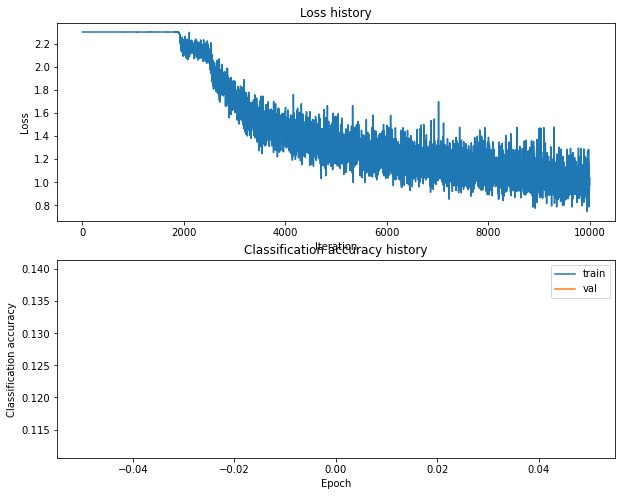

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

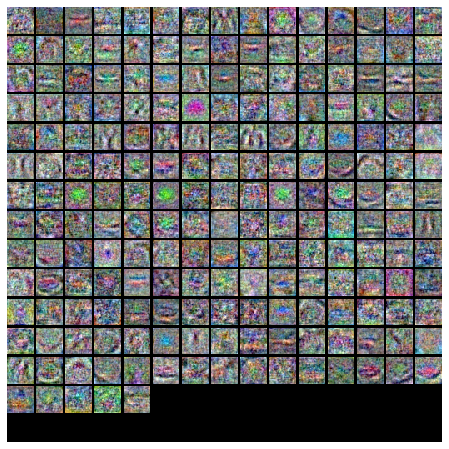

In [10]:
from sducs2019.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$
*尝试多次发现hidden_size需要到200，然后学习率从5e-3开始上调，num_iters需要大于2000才开始收敛*

In [11]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

#pass
input_size = 32 * 32 * 3
num_classes = 10
best_acc = -1.0
hidden_size=200
# Train the network
for lr in [5e-3 ,1e-3, 1e-2]:
    for reg in [1e-4, 5e-4, 1e-3, 4e-3,1e-2,0.5,0.25]:
        net = ThreeLayerNet(input_size, hidden_size, num_classes)
        stats = net.train(X_train, y_train, X_val, y_val,
                    num_iters=20000, batch_size=150,
                    learning_rate=lr, learning_rate_decay=0.95,
                    reg=reg, verbose=True)

        # Predict on the validation set
        val_acc = (net.predict(X_val) == y_val).mean()
        print('reg = %f, lr = %f, Valid_accuracy: %f' %(reg, lr, val_acc))
        if val_acc > best_acc:
            best_acc = val_acc
            best_net = net

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


iteration 0 / 20000: loss 2.302586
iteration 100 / 20000: loss 2.302534
iteration 200 / 20000: loss 2.302507
iteration 300 / 20000: loss 2.302645
iteration 400 / 20000: loss 2.302625
iteration 500 / 20000: loss 2.302763
iteration 600 / 20000: loss 2.302684
iteration 700 / 20000: loss 2.302816
iteration 800 / 20000: loss 2.302416
iteration 900 / 20000: loss 2.302440
iteration 1000 / 20000: loss 2.302738
iteration 1100 / 20000: loss 2.302836
iteration 1200 / 20000: loss 2.302479
iteration 1300 / 20000: loss 2.302318
iteration 1400 / 20000: loss 2.302426
iteration 1500 / 20000: loss 2.302262
iteration 1600 / 20000: loss 2.302385
iteration 1700 / 20000: loss 2.281326
iteration 1800 / 20000: loss 2.226122
iteration 1900 / 20000: loss 2.157579
iteration 2000 / 20000: loss 2.148639
iteration 2100 / 20000: loss 2.144507
iteration 2200 / 20000: loss 2.140819
iteration 2300 / 20000: loss 2.055570
iteration 2400 / 20000: loss 1.972144
iteration 2500 / 20000: loss 1.872952
iteration 2600 / 20000: 

iteration 1300 / 20000: loss 2.302745
iteration 1400 / 20000: loss 2.302427
iteration 1500 / 20000: loss 2.302811
iteration 1600 / 20000: loss 2.303020
iteration 1700 / 20000: loss 2.300309
iteration 1800 / 20000: loss 2.176380
iteration 1900 / 20000: loss 2.177501
iteration 2000 / 20000: loss 2.169179
iteration 2100 / 20000: loss 2.171784
iteration 2200 / 20000: loss 2.147214
iteration 2300 / 20000: loss 2.093265
iteration 2400 / 20000: loss 1.925913
iteration 2500 / 20000: loss 1.902430
iteration 2600 / 20000: loss 1.932990
iteration 2700 / 20000: loss 1.786592
iteration 2800 / 20000: loss 1.670514
iteration 2900 / 20000: loss 1.549671
iteration 3000 / 20000: loss 1.679453
iteration 3100 / 20000: loss 1.634615
iteration 3200 / 20000: loss 1.693821
iteration 3300 / 20000: loss 1.502129
iteration 3400 / 20000: loss 1.443260
iteration 3500 / 20000: loss 1.514388
iteration 3600 / 20000: loss 1.376831
iteration 3700 / 20000: loss 1.341399
iteration 3800 / 20000: loss 1.375624
iteration 39

iteration 2500 / 20000: loss 2.095920
iteration 2600 / 20000: loss 1.949721
iteration 2700 / 20000: loss 1.767578
iteration 2800 / 20000: loss 1.744022
iteration 2900 / 20000: loss 1.789590
iteration 3000 / 20000: loss 1.725412
iteration 3100 / 20000: loss 1.592116
iteration 3200 / 20000: loss 1.612602
iteration 3300 / 20000: loss 1.754579
iteration 3400 / 20000: loss 1.455408
iteration 3500 / 20000: loss 1.601097
iteration 3600 / 20000: loss 1.387851
iteration 3700 / 20000: loss 1.490193
iteration 3800 / 20000: loss 1.572064
iteration 3900 / 20000: loss 1.583795
iteration 4000 / 20000: loss 1.327682
iteration 4100 / 20000: loss 1.332768
iteration 4200 / 20000: loss 1.316363
iteration 4300 / 20000: loss 1.310796
iteration 4400 / 20000: loss 1.263859
iteration 4500 / 20000: loss 1.253685
iteration 4600 / 20000: loss 1.324825
iteration 4700 / 20000: loss 1.324077
iteration 4800 / 20000: loss 1.280510
iteration 4900 / 20000: loss 1.214004
iteration 5000 / 20000: loss 1.200653
iteration 51

iteration 3700 / 20000: loss 1.394826
iteration 3800 / 20000: loss 1.336690
iteration 3900 / 20000: loss 1.320279
iteration 4000 / 20000: loss 1.314532
iteration 4100 / 20000: loss 1.546865
iteration 4200 / 20000: loss 1.246925
iteration 4300 / 20000: loss 1.355264
iteration 4400 / 20000: loss 1.265325
iteration 4500 / 20000: loss 1.451267
iteration 4600 / 20000: loss 1.344498
iteration 4700 / 20000: loss 1.267394
iteration 4800 / 20000: loss 1.427335
iteration 4900 / 20000: loss 1.278574
iteration 5000 / 20000: loss 1.147134
iteration 5100 / 20000: loss 1.097333
iteration 5200 / 20000: loss 1.370229
iteration 5300 / 20000: loss 1.303347
iteration 5400 / 20000: loss 1.115950
iteration 5500 / 20000: loss 1.200365
iteration 5600 / 20000: loss 1.148257
iteration 5700 / 20000: loss 1.388241
iteration 5800 / 20000: loss 1.079506
iteration 5900 / 20000: loss 1.179833
iteration 6000 / 20000: loss 1.151433
iteration 6100 / 20000: loss 1.184806
iteration 6200 / 20000: loss 1.176743
iteration 63

iteration 4900 / 20000: loss 1.589860
iteration 5000 / 20000: loss 1.286776
iteration 5100 / 20000: loss 1.458546
iteration 5200 / 20000: loss 1.300519
iteration 5300 / 20000: loss 1.257030
iteration 5400 / 20000: loss 1.087251
iteration 5500 / 20000: loss 1.245315
iteration 5600 / 20000: loss 1.286941
iteration 5700 / 20000: loss 1.129427
iteration 5800 / 20000: loss 1.264882
iteration 5900 / 20000: loss 1.370273
iteration 6000 / 20000: loss 1.271395
iteration 6100 / 20000: loss 1.182959
iteration 6200 / 20000: loss 1.257775
iteration 6300 / 20000: loss 1.045382
iteration 6400 / 20000: loss 1.277929
iteration 6500 / 20000: loss 1.133890
iteration 6600 / 20000: loss 1.055990
iteration 6700 / 20000: loss 1.117093
iteration 6800 / 20000: loss 1.169325
iteration 6900 / 20000: loss 1.086306
iteration 7000 / 20000: loss 1.074408
iteration 7100 / 20000: loss 1.102443
iteration 7200 / 20000: loss 1.205170
iteration 7300 / 20000: loss 1.231217
iteration 7400 / 20000: loss 1.149665
iteration 75

iteration 6100 / 20000: loss 2.302133
iteration 6200 / 20000: loss 2.302092
iteration 6300 / 20000: loss 2.302958
iteration 6400 / 20000: loss 2.302583
iteration 6500 / 20000: loss 2.302493
iteration 6600 / 20000: loss 2.302440
iteration 6700 / 20000: loss 2.303016
iteration 6800 / 20000: loss 2.302661
iteration 6900 / 20000: loss 2.302358
iteration 7000 / 20000: loss 2.302457
iteration 7100 / 20000: loss 2.303160
iteration 7200 / 20000: loss 2.302762
iteration 7300 / 20000: loss 2.302183
iteration 7400 / 20000: loss 2.302723
iteration 7500 / 20000: loss 2.302576
iteration 7600 / 20000: loss 2.301802
iteration 7700 / 20000: loss 2.302511
iteration 7800 / 20000: loss 2.302199
iteration 7900 / 20000: loss 2.302605
iteration 8000 / 20000: loss 2.302472
iteration 8100 / 20000: loss 2.301940
iteration 8200 / 20000: loss 2.302380
iteration 8300 / 20000: loss 2.302845
iteration 8400 / 20000: loss 2.302515
iteration 8500 / 20000: loss 2.302099
iteration 8600 / 20000: loss 2.302391
iteration 87

iteration 7300 / 20000: loss 2.302537
iteration 7400 / 20000: loss 2.302856
iteration 7500 / 20000: loss 2.303198
iteration 7600 / 20000: loss 2.302585
iteration 7700 / 20000: loss 2.302755
iteration 7800 / 20000: loss 2.302826
iteration 7900 / 20000: loss 2.302193
iteration 8000 / 20000: loss 2.302567
iteration 8100 / 20000: loss 2.302387
iteration 8200 / 20000: loss 2.302090
iteration 8300 / 20000: loss 2.302091
iteration 8400 / 20000: loss 2.302776
iteration 8500 / 20000: loss 2.301972
iteration 8600 / 20000: loss 2.302448
iteration 8700 / 20000: loss 2.302217
iteration 8800 / 20000: loss 2.303669
iteration 8900 / 20000: loss 2.302610
iteration 9000 / 20000: loss 2.302459
iteration 9100 / 20000: loss 2.303254
iteration 9200 / 20000: loss 2.302492
iteration 9300 / 20000: loss 2.302328
iteration 9400 / 20000: loss 2.302020
iteration 9500 / 20000: loss 2.301898
iteration 9600 / 20000: loss 2.302986
iteration 9700 / 20000: loss 2.302070
iteration 9800 / 20000: loss 2.302057
iteration 99

iteration 8500 / 20000: loss 2.302490
iteration 8600 / 20000: loss 2.302698
iteration 8700 / 20000: loss 2.302461
iteration 8800 / 20000: loss 2.302125
iteration 8900 / 20000: loss 2.302000
iteration 9000 / 20000: loss 2.301784
iteration 9100 / 20000: loss 2.299499
iteration 9200 / 20000: loss 2.293563
iteration 9300 / 20000: loss 2.233814
iteration 9400 / 20000: loss 2.226994
iteration 9500 / 20000: loss 2.135505
iteration 9600 / 20000: loss 2.115201
iteration 9700 / 20000: loss 2.203829
iteration 9800 / 20000: loss 2.146785
iteration 9900 / 20000: loss 2.146004
iteration 10000 / 20000: loss 2.108956
iteration 10100 / 20000: loss 2.150835
iteration 10200 / 20000: loss 2.245142
iteration 10300 / 20000: loss 2.148054
iteration 10400 / 20000: loss 2.114736
iteration 10500 / 20000: loss 2.191510
iteration 10600 / 20000: loss 2.189612
iteration 10700 / 20000: loss 2.131874
iteration 10800 / 20000: loss 2.151571
iteration 10900 / 20000: loss 2.175511
iteration 11000 / 20000: loss 2.130755
i

iteration 9700 / 20000: loss 2.046039
iteration 9800 / 20000: loss 2.110675
iteration 9900 / 20000: loss 2.211725
iteration 10000 / 20000: loss 2.128539
iteration 10100 / 20000: loss 2.166115
iteration 10200 / 20000: loss 2.164373
iteration 10300 / 20000: loss 2.204584
iteration 10400 / 20000: loss 2.121113
iteration 10500 / 20000: loss 2.152791
iteration 10600 / 20000: loss 2.123258
iteration 10700 / 20000: loss 2.175037
iteration 10800 / 20000: loss 2.110326
iteration 10900 / 20000: loss 2.071668
iteration 11000 / 20000: loss 2.082058
iteration 11100 / 20000: loss 2.110297
iteration 11200 / 20000: loss 2.073226
iteration 11300 / 20000: loss 1.999893
iteration 11400 / 20000: loss 2.011152
iteration 11500 / 20000: loss 2.010427
iteration 11600 / 20000: loss 1.969961
iteration 11700 / 20000: loss 1.968654
iteration 11800 / 20000: loss 1.991096
iteration 11900 / 20000: loss 1.990926
iteration 12000 / 20000: loss 1.928594
iteration 12100 / 20000: loss 1.911716
iteration 12200 / 20000: los

iteration 10900 / 20000: loss 2.147941
iteration 11000 / 20000: loss 2.136797
iteration 11100 / 20000: loss 2.122294
iteration 11200 / 20000: loss 2.159262
iteration 11300 / 20000: loss 2.148881
iteration 11400 / 20000: loss 2.154731
iteration 11500 / 20000: loss 2.173905
iteration 11600 / 20000: loss 2.136367
iteration 11700 / 20000: loss 2.110220
iteration 11800 / 20000: loss 2.139003
iteration 11900 / 20000: loss 2.061505
iteration 12000 / 20000: loss 2.162332
iteration 12100 / 20000: loss 2.050595
iteration 12200 / 20000: loss 2.034080
iteration 12300 / 20000: loss 2.066467
iteration 12400 / 20000: loss 2.035794
iteration 12500 / 20000: loss 2.061574
iteration 12600 / 20000: loss 1.903508
iteration 12700 / 20000: loss 1.918333
iteration 12800 / 20000: loss 1.886387
iteration 12900 / 20000: loss 1.869430
iteration 13000 / 20000: loss 1.816651
iteration 13100 / 20000: loss 1.831386
iteration 13200 / 20000: loss 1.867669
iteration 13300 / 20000: loss 1.794684
iteration 13400 / 20000: 

iteration 12100 / 20000: loss 2.012699
iteration 12200 / 20000: loss 2.135710
iteration 12300 / 20000: loss 2.059807
iteration 12400 / 20000: loss 2.005613
iteration 12500 / 20000: loss 2.019438
iteration 12600 / 20000: loss 2.014762
iteration 12700 / 20000: loss 1.992380
iteration 12800 / 20000: loss 1.936198
iteration 12900 / 20000: loss 1.865918
iteration 13000 / 20000: loss 1.865561
iteration 13100 / 20000: loss 1.816774
iteration 13200 / 20000: loss 1.899909
iteration 13300 / 20000: loss 1.842545
iteration 13400 / 20000: loss 1.727024
iteration 13500 / 20000: loss 1.838138
iteration 13600 / 20000: loss 1.775598
iteration 13700 / 20000: loss 1.882655
iteration 13800 / 20000: loss 1.736770
iteration 13900 / 20000: loss 1.651971
iteration 14000 / 20000: loss 1.793446
iteration 14100 / 20000: loss 1.623154
iteration 14200 / 20000: loss 1.577617
iteration 14300 / 20000: loss 1.748034
iteration 14400 / 20000: loss 1.691363
iteration 14500 / 20000: loss 1.654006
iteration 14600 / 20000: 

iteration 13300 / 20000: loss 1.953704
iteration 13400 / 20000: loss 2.018916
iteration 13500 / 20000: loss 1.855325
iteration 13600 / 20000: loss 1.923140
iteration 13700 / 20000: loss 1.943753
iteration 13800 / 20000: loss 1.874920
iteration 13900 / 20000: loss 1.883469
iteration 14000 / 20000: loss 1.841325
iteration 14100 / 20000: loss 1.929756
iteration 14200 / 20000: loss 1.815340
iteration 14300 / 20000: loss 1.877944
iteration 14400 / 20000: loss 1.743252
iteration 14500 / 20000: loss 1.772002
iteration 14600 / 20000: loss 1.671814
iteration 14700 / 20000: loss 1.664972
iteration 14800 / 20000: loss 1.859094
iteration 14900 / 20000: loss 1.858442
iteration 15000 / 20000: loss 1.755771
iteration 15100 / 20000: loss 1.672949
iteration 15200 / 20000: loss 1.731758
iteration 15300 / 20000: loss 1.684628
iteration 15400 / 20000: loss 1.771664
iteration 15500 / 20000: loss 1.694051
iteration 15600 / 20000: loss 1.644290
iteration 15700 / 20000: loss 1.638170
iteration 15800 / 20000: 

iteration 14500 / 20000: loss 2.302399
iteration 14600 / 20000: loss 2.302143
iteration 14700 / 20000: loss 2.302976
iteration 14800 / 20000: loss 2.302621
iteration 14900 / 20000: loss 2.302148
iteration 15000 / 20000: loss 2.302444
iteration 15100 / 20000: loss 2.302311
iteration 15200 / 20000: loss 2.302258
iteration 15300 / 20000: loss 2.302477
iteration 15400 / 20000: loss 2.302920
iteration 15500 / 20000: loss 2.302464
iteration 15600 / 20000: loss 2.302876
iteration 15700 / 20000: loss 2.302813
iteration 15800 / 20000: loss 2.302751
iteration 15900 / 20000: loss 2.302266
iteration 16000 / 20000: loss 2.302472
iteration 16100 / 20000: loss 2.302473
iteration 16200 / 20000: loss 2.302832
iteration 16300 / 20000: loss 2.302665
iteration 16400 / 20000: loss 2.302955
iteration 16500 / 20000: loss 2.302643
iteration 16600 / 20000: loss 2.302389
iteration 16700 / 20000: loss 2.302749
iteration 16800 / 20000: loss 2.302552
iteration 16900 / 20000: loss 2.302718
iteration 17000 / 20000: 

iteration 15700 / 20000: loss 2.302550
iteration 15800 / 20000: loss 2.302322
iteration 15900 / 20000: loss 2.302129
iteration 16000 / 20000: loss 2.302610
iteration 16100 / 20000: loss 2.302734
iteration 16200 / 20000: loss 2.302472
iteration 16300 / 20000: loss 2.302470
iteration 16400 / 20000: loss 2.302865
iteration 16500 / 20000: loss 2.302525
iteration 16600 / 20000: loss 2.302445
iteration 16700 / 20000: loss 2.302809
iteration 16800 / 20000: loss 2.302834
iteration 16900 / 20000: loss 2.302705
iteration 17000 / 20000: loss 2.302410
iteration 17100 / 20000: loss 2.302677
iteration 17200 / 20000: loss 2.302597
iteration 17300 / 20000: loss 2.302685
iteration 17400 / 20000: loss 2.302624
iteration 17500 / 20000: loss 2.302666
iteration 17600 / 20000: loss 2.302546
iteration 17700 / 20000: loss 2.302561
iteration 17800 / 20000: loss 2.302618
iteration 17900 / 20000: loss 2.302519
iteration 18000 / 20000: loss 2.302755
iteration 18100 / 20000: loss 2.302633
iteration 18200 / 20000: 

iteration 16900 / 20000: loss 0.288125
iteration 17000 / 20000: loss 0.221381
iteration 17100 / 20000: loss 0.237442
iteration 17200 / 20000: loss 0.392978
iteration 17300 / 20000: loss 0.332286
iteration 17400 / 20000: loss 0.392538
iteration 17500 / 20000: loss 0.303990
iteration 17600 / 20000: loss 0.177041
iteration 17700 / 20000: loss 0.417962
iteration 17800 / 20000: loss 0.382378
iteration 17900 / 20000: loss 0.465338
iteration 18000 / 20000: loss 0.197299
iteration 18100 / 20000: loss 0.246033
iteration 18200 / 20000: loss 0.308567
iteration 18300 / 20000: loss 0.334356
iteration 18400 / 20000: loss 0.712507
iteration 18500 / 20000: loss 0.431947
iteration 18600 / 20000: loss 0.437731
iteration 18700 / 20000: loss 0.290893
iteration 18800 / 20000: loss 0.317887
iteration 18900 / 20000: loss 0.287061
iteration 19000 / 20000: loss 0.415426
iteration 19100 / 20000: loss 0.385955
iteration 19200 / 20000: loss 0.244156
iteration 19300 / 20000: loss 0.210692
iteration 19400 / 20000: 

iteration 18100 / 20000: loss 0.379939
iteration 18200 / 20000: loss 0.333016
iteration 18300 / 20000: loss 0.234866
iteration 18400 / 20000: loss 0.514162
iteration 18500 / 20000: loss 0.518639
iteration 18600 / 20000: loss 0.480026
iteration 18700 / 20000: loss 0.368732
iteration 18800 / 20000: loss 0.408339
iteration 18900 / 20000: loss 0.407716
iteration 19000 / 20000: loss 0.517269
iteration 19100 / 20000: loss 0.371678
iteration 19200 / 20000: loss 0.341940
iteration 19300 / 20000: loss 0.419996
iteration 19400 / 20000: loss 0.384422
iteration 19500 / 20000: loss 0.302670
iteration 19600 / 20000: loss 0.189769
iteration 19700 / 20000: loss 0.422226
iteration 19800 / 20000: loss 0.315575
iteration 19900 / 20000: loss 0.442272
reg = 0.000500, lr = 0.010000, Valid_accuracy: 0.522000
iteration 0 / 20000: loss 2.302592
iteration 100 / 20000: loss 2.302737
iteration 200 / 20000: loss 2.302227
iteration 300 / 20000: loss 2.302379
iteration 400 / 20000: loss 2.302549
iteration 500 / 2000

iteration 19300 / 20000: loss 0.441030
iteration 19400 / 20000: loss 0.484864
iteration 19500 / 20000: loss 0.559144
iteration 19600 / 20000: loss 0.350508
iteration 19700 / 20000: loss 0.331396
iteration 19800 / 20000: loss 0.460975
iteration 19900 / 20000: loss 0.350257
reg = 0.001000, lr = 0.010000, Valid_accuracy: 0.518000
iteration 0 / 20000: loss 2.302611
iteration 100 / 20000: loss 2.302463
iteration 200 / 20000: loss 2.302872
iteration 300 / 20000: loss 2.302760
iteration 400 / 20000: loss 2.303223
iteration 500 / 20000: loss 2.302275
iteration 600 / 20000: loss 2.302954
iteration 700 / 20000: loss 2.303064
iteration 800 / 20000: loss 2.302423
iteration 900 / 20000: loss 2.302066
iteration 1000 / 20000: loss 2.216287
iteration 1100 / 20000: loss 2.149772
iteration 1200 / 20000: loss 2.099808
iteration 1300 / 20000: loss 1.953066
iteration 1400 / 20000: loss 1.836723
iteration 1500 / 20000: loss 1.880725
iteration 1600 / 20000: loss 1.691668
iteration 1700 / 20000: loss 1.742819

iteration 400 / 20000: loss 2.302640
iteration 500 / 20000: loss 2.302900
iteration 600 / 20000: loss 2.302843
iteration 700 / 20000: loss 2.302592
iteration 800 / 20000: loss 2.302708
iteration 900 / 20000: loss 2.303008
iteration 1000 / 20000: loss 2.254612
iteration 1100 / 20000: loss 2.239233
iteration 1200 / 20000: loss 2.130596
iteration 1300 / 20000: loss 2.111665
iteration 1400 / 20000: loss 1.930636
iteration 1500 / 20000: loss 1.772534
iteration 1600 / 20000: loss 1.834111
iteration 1700 / 20000: loss 1.649910
iteration 1800 / 20000: loss 1.638806
iteration 1900 / 20000: loss 1.488184
iteration 2000 / 20000: loss 1.495983
iteration 2100 / 20000: loss 1.526812
iteration 2200 / 20000: loss 1.310687
iteration 2300 / 20000: loss 1.456049
iteration 2400 / 20000: loss 1.493059
iteration 2500 / 20000: loss 1.615834
iteration 2600 / 20000: loss 1.448607
iteration 2700 / 20000: loss 1.488740
iteration 2800 / 20000: loss 1.420502
iteration 2900 / 20000: loss 1.235458
iteration 3000 / 2

iteration 1600 / 20000: loss 2.303444
iteration 1700 / 20000: loss 2.302630
iteration 1800 / 20000: loss 2.301386
iteration 1900 / 20000: loss 2.303202
iteration 2000 / 20000: loss 2.302363
iteration 2100 / 20000: loss 2.301804
iteration 2200 / 20000: loss 2.304104
iteration 2300 / 20000: loss 2.302505
iteration 2400 / 20000: loss 2.303578
iteration 2500 / 20000: loss 2.301546
iteration 2600 / 20000: loss 2.303147
iteration 2700 / 20000: loss 2.302627
iteration 2800 / 20000: loss 2.302847
iteration 2900 / 20000: loss 2.302478
iteration 3000 / 20000: loss 2.302762
iteration 3100 / 20000: loss 2.302865
iteration 3200 / 20000: loss 2.302574
iteration 3300 / 20000: loss 2.302892
iteration 3400 / 20000: loss 2.302318
iteration 3500 / 20000: loss 2.303126
iteration 3600 / 20000: loss 2.302030
iteration 3700 / 20000: loss 2.303280
iteration 3800 / 20000: loss 2.301957
iteration 3900 / 20000: loss 2.302338
iteration 4000 / 20000: loss 2.302254
iteration 4100 / 20000: loss 2.301979
iteration 42

iteration 2800 / 20000: loss 2.302791
iteration 2900 / 20000: loss 2.301839
iteration 3000 / 20000: loss 2.303232
iteration 3100 / 20000: loss 2.302422
iteration 3200 / 20000: loss 2.302334
iteration 3300 / 20000: loss 2.302522
iteration 3400 / 20000: loss 2.302399
iteration 3500 / 20000: loss 2.302517
iteration 3600 / 20000: loss 2.302899
iteration 3700 / 20000: loss 2.302807
iteration 3800 / 20000: loss 2.302709
iteration 3900 / 20000: loss 2.301861
iteration 4000 / 20000: loss 2.303023
iteration 4100 / 20000: loss 2.302566
iteration 4200 / 20000: loss 2.302414
iteration 4300 / 20000: loss 2.302636
iteration 4400 / 20000: loss 2.302381
iteration 4500 / 20000: loss 2.302760
iteration 4600 / 20000: loss 2.302708
iteration 4700 / 20000: loss 2.303058
iteration 4800 / 20000: loss 2.302501
iteration 4900 / 20000: loss 2.302518
iteration 5000 / 20000: loss 2.302358
iteration 5100 / 20000: loss 2.302204
iteration 5200 / 20000: loss 2.302414
iteration 5300 / 20000: loss 2.302864
iteration 54

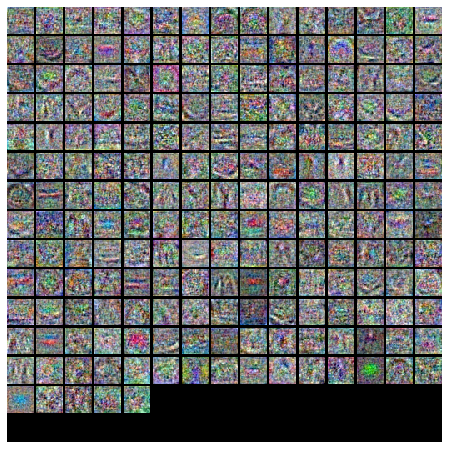

In [14]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [15]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.537


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$
*1,2,3*
$\color{blue}{\textit Your Explanation:}$
*这个现象是过拟合的典型特征，可以通过增加训练集，增加网络参数数量，加大正则化减小过拟合。*

